# Projeto 1 - Ciência dos Dados

Nome: Lucas Hix

## Pergunta a ser respondida

A entrada de um país em um bloco econômico que possui redução de tarifas em protudos agrículas, assim como em maquinário para produção, terá um efeito de aumentar a produção agrícula do pais por $km^2$ de área agrículas acima da média mundial?

Ultilizando como exemplo os paises membros das organizações intergovernamentais do mercosul e da união europeia

## Explicação da hipótese e mecanismo

A redução de tarifas na exportação de protudos agrículas e importação de maquinário para a produção dentro de um bloco econômico acaba permetindo que este país tenha um aumento de produção agricula em sua área agrícula maior que a do mundo uma vez que estas tarifas são muito mais vantajosas para este país do que acordos bilaterias com outros países permentido portando a aquisição de tecnologia para a produção além de um aumento na sua exportação.

[Artigo científico de base](https://www.questia.com/library/journal/1G1-65379114/potential-gains-from-reducing-trade-barriers-in-manufacturing)

## Bases de dados usadas

[World Agricultural land (sq. km)](https://data.worldbank.org/indicator/AG.LND.AGRI.K2) <p>
[World Cereal production (metric tons)](https://data.worldbank.org/indicator/AG.PRD.CREL.MT)

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tabelas Originais

# Tabela da Área Rural

tabela_area_rural = pd.read_excel("Area Rural.xls", sheet_name="Data", skiprows=3)
tabela_area_rural = tabela_area_rural.fillna(1);

# Tabela de Produção Agricula

tabela_producao_agricula = pd.read_excel("Producao Agricula.xls", sheet_name="Data", skiprows=3)
tabela_producao_agricula = tabela_producao_agricula.fillna(0);

In [3]:
# Criando a Tabela que vai ser usada

data = pd.DataFrame(index=tabela_producao_agricula.index)

data["Country Name"] = tabela_producao_agricula["Country Name"]

for x in range(1961, 2017):
    data[x] = tabela_producao_agricula[str(x)]/tabela_area_rural[str(x)]

data = data.set_index("Country Name")

data.head(3)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Afghanistan,9.801061,9.788136,8.934144,9.853986,9.993399,9.202648,10.073988,10.310690,10.627434,9.240646,...,15.262464,10.419414,17.182801,15.713118,12.347718,16.826695,17.199496,17.800382,15.325273,14.600111
Angola,0.951548,0.949301,0.900035,0.985153,0.981317,0.876091,0.898308,0.917273,1.129077,1.003336,...,1.353723,1.308218,1.813079,2.024223,2.395026,0.863782,2.829191,3.080649,3.412926,4.095849


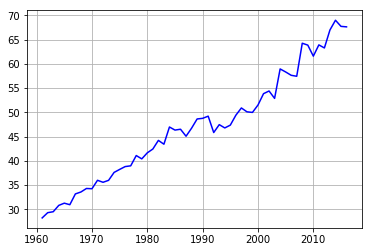

In [4]:
# Crecimento Mundial

media_mundial = []

for column in data.columns:
    count = 0;
    total = 0;
    
    for dado in data[column]:
        if dado > 0:
            total = total + dado
            count = count + 1
    
    media_mundial.append(total/count)
    
plt.plot(data.columns, media_mundial, color="b")
plt.grid(True)
plt.show()

In [19]:
# Mercosul fundado em 1 de janeiro de 1991

pre_mercosul = data.loc[("Argentina", "Brazil", "Paraguay", "Uruguay"), 1991>data.columns].transpose()
mercosul = data.loc[("Argentina", "Brazil", "Paraguay", "Uruguay"), 1991<=data.columns].transpose()

media_pre_mercosul = []

for ano in pre_mercosul.index:
    count = 0;
    total = 0;
    
    for dado in pre_mercosul[ano]:
        if dado > 0:
            total = total + dado
            count = count + 1
        
            
plt.plot(list(pre_mercosul.index), media_mundial[:len(pre_mercosul.index)], color="b")
# plt.plot(pre_mercosul.index, media_pre_mercosul, color="r")

#plt.plot(pre_mercosul.index, media_mundial[pre_mercosul.index,:len(pre_mercosul.index)], color="b")
plt.plot(pre_mercosul.index, media_pre_mercosul, color="r")

plt.grid(True)
plt.show()

KeyError: 1961

In [16]:
pre_mercosul.index

Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990],
      dtype='object')

In [17]:
media_mundial[:len(pre_mercosul.index)]

[28.23109701920197,
 29.312169358838684,
 29.507042516476314,
 30.81363253026965,
 31.27029887372138,
 30.954874532906945,
 33.17688212508421,
 33.5746681057877,
 34.29776486153868,
 34.2459208203447,
 35.98643970194372,
 35.57554355996062,
 35.97582569379429,
 37.61268358519756,
 38.2275440936291,
 38.81341806074069,
 38.967068292934265,
 41.08774551016028,
 40.401127788103416,
 41.64866297472333,
 42.43113970155478,
 44.20905942774035,
 43.42501161911088,
 46.970897631180684,
 46.335700173207286,
 46.510422058532974,
 45.070566003036944,
 46.72842027057372,
 48.626337959757116,
 48.756163181244894]

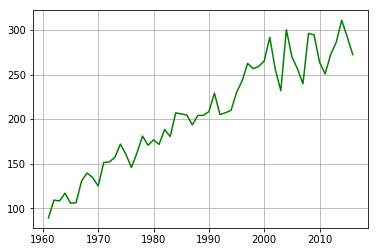

In [6]:
# Paises fundadores da União Europeia (1 de janeiro de 1958)

eu_list_1 = ["Belgium", "France", "Germany", "Italy", "Luxembourg", "Netherlands"]

eu_1 = data.loc[eu_list_1, :].transpose()

plt.plot(eu_1.index, eu_1["Germany"], color="g")
plt.grid(True)
plt.show()

In [18]:
eu_1["Germany"]

1961     89.070142
1962    109.145883
1963    108.083290
1964    116.853356
1965    105.560264
1966    106.202826
1967    130.744380
1968    139.477926
1969    134.273600
1970    124.869179
1971    151.356400
1972    151.881704
1973    157.063587
1974    171.920918
1975    160.515395
1976    145.664207
1977    161.990908
1978    180.944027
1979    170.643778
1980    176.645289
1981    171.653128
1982    188.332844
1983    180.457103
1984    206.949185
1985    205.850110
1986    204.619426
1987    193.440618
1988    204.077455
1989    204.259858
1990    208.404997
1991    229.154167
1992    205.052575
1993    207.128685
1994    209.895499
1995    229.855682
1996    243.038692
1997    262.513309
1998    256.575439
1999    259.165281
2000    265.240415
2001    291.824152
2002    255.739524
2003    231.904235
2004    300.340916
2005    269.979449
2006    256.549038
2007    239.717693
2008    296.110502
2009    294.623943
2010    263.705024
2011    250.735092
2012    272.422588
2013    286.

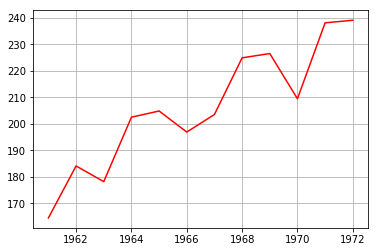

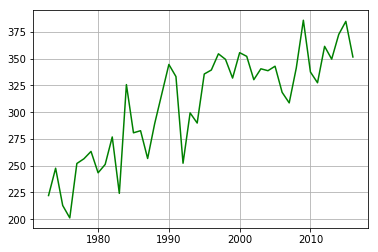

In [7]:
# União Europeia entrda de paises em 1 de janeiro de 1973

eu_list_2 = []
eu_list_2.extend(eu_list_1)
eu_list_2.extend(("Denmark", "Ireland", "United Kingdom"))

pre_eu_2 = data.loc[eu_list_2, 1973>data.columns].transpose()
eu_2 = data.loc[eu_list_2, 1973<=data.columns].transpose()

plt.plot(pre_eu_2.index, pre_eu_2["Denmark"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_2.index, eu_2["Denmark"], color="g")
plt.grid(True)
plt.show()

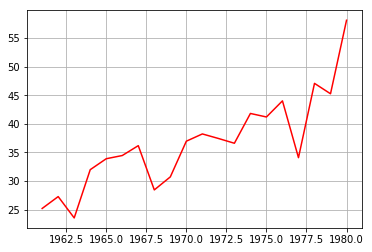

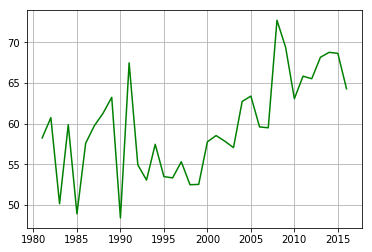

In [8]:
# União Europeia entrda da Grécia (1 de janeiro de 1981)

eu_list_3 = []
eu_list_3.extend(eu_list_2)
eu_list_3.append("Greece")

pre_eu_3 = data.loc[eu_list_3, 1981>data.columns].transpose()
eu_3 = data.loc[eu_list_3, 1981<=data.columns].transpose()

plt.plot(pre_eu_3.index, pre_eu_3["Greece"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_3.index, eu_3["Greece"], color="g")
plt.grid(True)
plt.show()

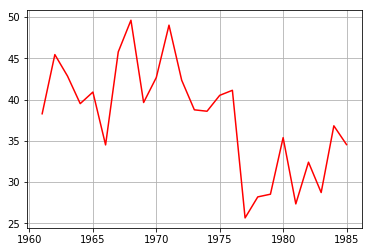

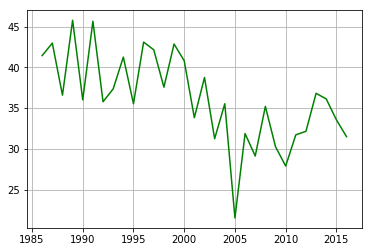

In [9]:
# União Europeia entrda de paises em 1 de janeiro de 1986

eu_list_4 = []
eu_list_4.extend(eu_list_3)
eu_list_4.extend(("Portugal", "Spain"))

pre_eu_4 = data.loc[eu_list_4, 1986>data.columns].transpose()
eu_4 = data.loc[eu_list_4, 1986<=data.columns].transpose()

plt.plot(pre_eu_4.index, pre_eu_4["Portugal"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_4.index, eu_4["Portugal"], color="g")
plt.grid(True)
plt.show()

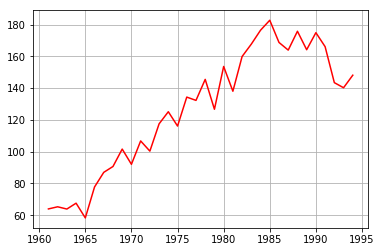

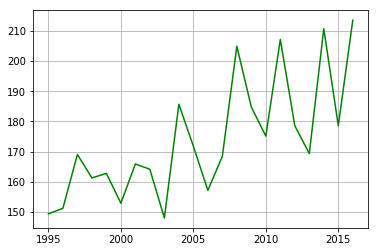

In [10]:
# União Europeia entrda de paises em 1 de janeiro de 1995

eu_list_5 = []
eu_list_5.extend(eu_list_4)
eu_list_5.extend(("Austria", "Finland", "Sweden"))

pre_eu_5 = data.loc[eu_list_5, 1995>data.columns].transpose()
eu_5 = data.loc[eu_list_5, 1995<=data.columns].transpose()

plt.plot(pre_eu_5.index, pre_eu_5["Austria"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_5.index, eu_5["Austria"], color="g")
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


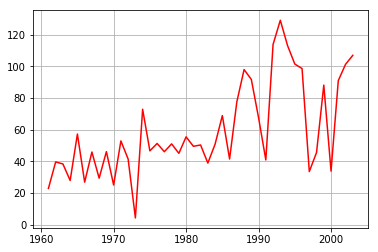

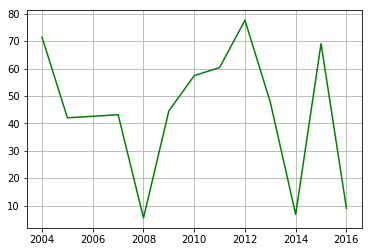

In [11]:
# União Europeia entrda de paises em 1 de maio de 2004

eu_list_6 = []
eu_list_6.extend(eu_list_5)
eu_list_6.extend(("Czechia", "Cyprus", "Estonia", "Hungary", "Latvia", "Lithuania", "Malta", "Poland",
                  "Slovakia", "Slovenia"))

pre_eu_6 = data.loc[eu_list_6, 2004>data.columns].transpose()
eu_6 = data.loc[eu_list_6, 2004<=data.columns].transpose()

plt.plot(pre_eu_6.index, pre_eu_6["Cyprus"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_6.index, eu_6["Cyprus"], color="g")
plt.grid(True)
plt.show()

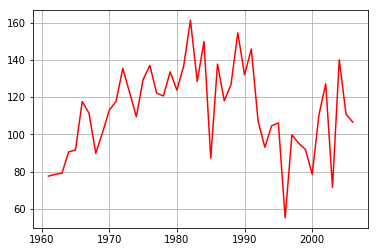

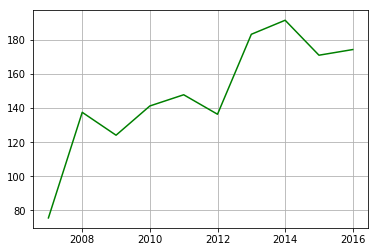

In [12]:
# União Europeia entrda de paises em 1 de janeiro de 2007

eu_list_7 = []
eu_list_7.extend(eu_list_6)
eu_list_7.extend(("Bulgaria", "Romania"))

pre_eu_7 = data.loc[eu_list_7, 2007>data.columns].transpose()
eu_7 = data.loc[eu_list_7, 2007<=data.columns].transpose()

plt.plot(pre_eu_7.index, pre_eu_7["Bulgaria"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_7.index, eu_7["Bulgaria"], color="g")
plt.grid(True)
plt.show()

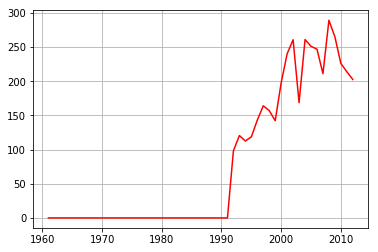

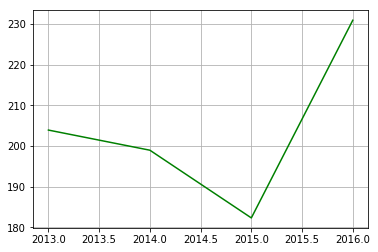

In [13]:
# União Europeia entrda da Croácia (1 de julho de 2013)

eu_list_8 = []
eu_list_8.extend(eu_list_1)
eu_list_8.append("Croatia")

pre_eu_8 = data.loc[eu_list_8, 2013>data.columns].transpose()
eu_8 = data.loc[eu_list_8, 2013<=data.columns].transpose()

plt.plot(pre_eu_8.index, pre_eu_8["Croatia"], color="r")
plt.grid(True)
plt.show()
plt.plot(eu_8.index, eu_8["Croatia"], color="g")
plt.grid(True)
plt.show()

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados